# Market Volatility Analysis and Predictive Statistical Model for the S&P500

In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy import integrate, stats
from predictive_model import predict
market_data = pd.read_csv("S&P500.csv")

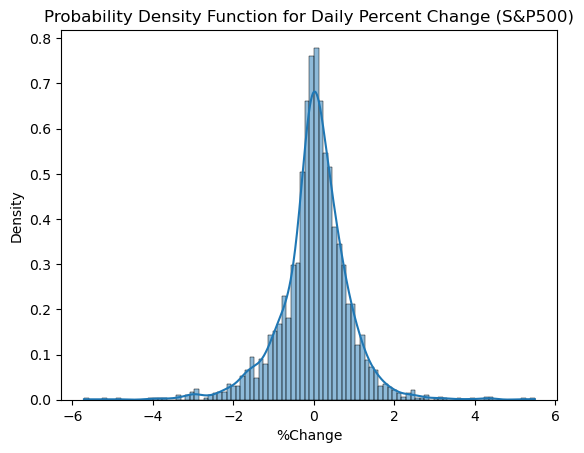

Mean: 0.019%	Median: 0.043%	Standard Deviation: 0.881%
Estimation for probabiltiy of positive daily return: 0.5375219568671614
Sample proportion of positive daily return: 0.5349761526232114


In [2]:
# Add calculated column for daily percent change
market_data = market_data[market_data['Open'] != 0]
market_data['%Change'] = (market_data['Close/Last'] / market_data['Open']) * 100 - 100

# Plot PDF and histogram for all daily changes
market_change_pdf = sns.histplot(market_data['%Change'], stat='density', kde=True, kde_kws={'gridsize': 1000})
plt.title('Probability Density Function for Daily Percent Change (S&P500)')
plt.show()

# Find Mean Median and Standard Deviation of daily percent change
market_change_summary = market_data['%Change'].describe()
print(f'Mean: {round(market_change_summary['mean'], 3)}%\tMedian: {round(market_change_summary['50%'], 3)}%\tStandard Deviation: {round(market_change_summary['std'], 3)}%')

# Integrate over the daily percent change PDF to find its CDF 
xdata, ydata = market_change_pdf.get_lines()[0].get_data()
market_change_cdf = integrate.cumulative_trapezoid(y=ydata, x=xdata, dx=0.1, initial=0)

# Estimate the probability of a positive daily return from CDF
probability_positive_return = market_change_cdf[-1] - market_change_cdf[min(range(len(xdata)), key=lambda i: abs(xdata[i]))]
print(f'Estimation for probabiltiy of positive daily return: {round(probability_positive_return, 3)}')

# Check our estimate by calculating the sample proportion of positive daily return
proportion_positive_return = market_data[market_data['%Change'] > 0].size / market_data.size
print(f'Sample proportion of positive daily return: {round(proportion_positive_return, 3)}')

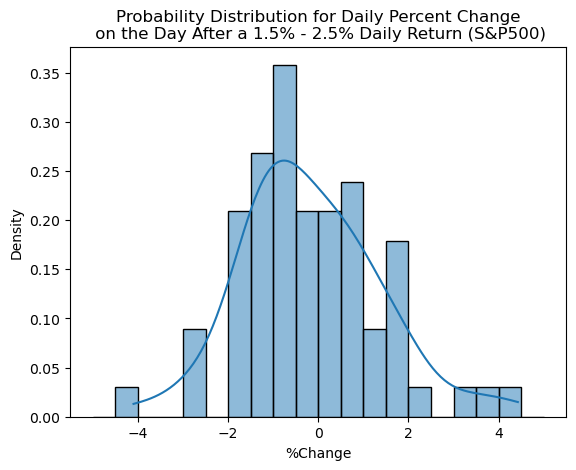

Mean: -0.171%	Median: -0.332%	Standard Deviation: 1.543%
Probability of randomly observing sample mean of -1.71%: -0.353


In [6]:
# Plot example of a prediction distribution for day after 1.5% - 2% daily return
values = predict(market_data['%Change'].values.tolist(), [2], 0.5, 'day')
sns.histplot(values, stat='density', kde=True, bins=20, binwidth=0.5, binrange=(-5,5))
plt.title('Probability Distribution for Daily Percent Change\n on the Day After a 1.5% - 2.5% Daily Return (S&P500)')
plt.xlabel('%Change')
plt.show()

# Find Mean Median and Standard Deviation of the above plot
prediction_values_summary = pd.DataFrame(data={'values': values})['values'].describe()
print(f'Mean: {round(prediction_values_summary['mean'], 3)}%\tMedian: {round(prediction_values_summary['50%'], 3)}%\tStandard Deviation: {round(prediction_values_summary['std'], 3)}%')

# Conduct 
p_value = market_change_cdf[0] - market_change_cdf[min(range(len(xdata)), key=lambda i: abs(xdata[i] - prediction_values_summary['mean']))]
print(f'Probability of randomly observing sample mean of -1.71%: {round(p_value, 3)}')